In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

soccer_data = pd.read_csv('nwsl-team-stats.csv')

soccer_data.head()

,team_name,season,games_played,goal_differential,goals,goals_conceded,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
0,Boston Breakers,2016,20,-33,14,47,25.57,8.97,67.38,57.86,47,42.95,77.42
1,Boston Breakers,2017,24,-11,24,35,23.70,12.37,72.53,61.42,48,42.78,73.49
2,Chicago Red Stars,2016,21,3,25,22,21.19,11.79,67.35,57.74,46,48.58,84.32
3,Chicago Red Stars,2017,25,2,33,31,21.08,13.10,69.23,61.52,47,49.60,71.29
4,Chicago Red Stars,2018,25,8,38,30,25.96,13.67,71.63,64.55,51,45.68,67.97


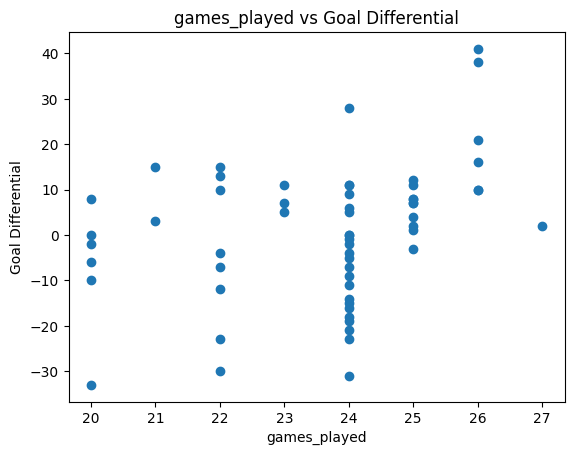

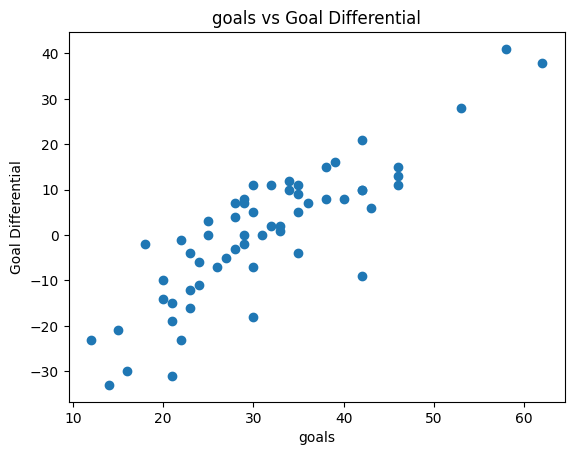

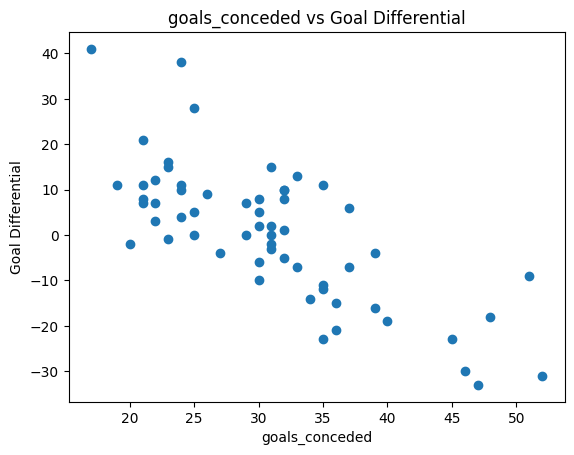

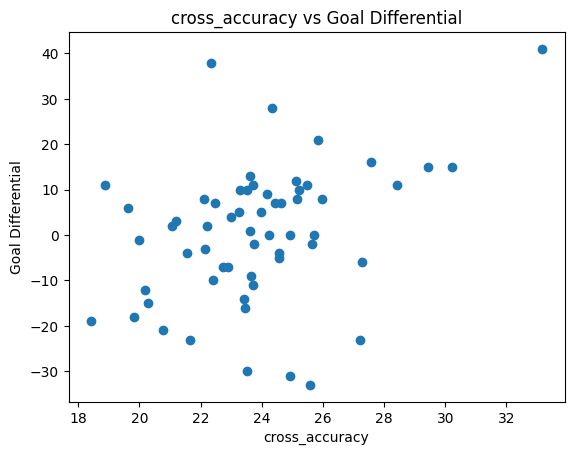

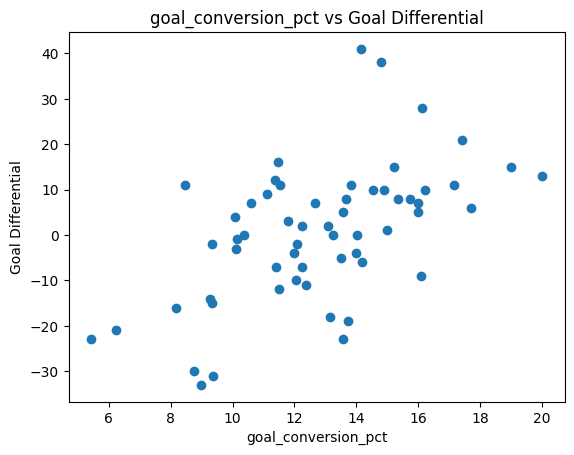

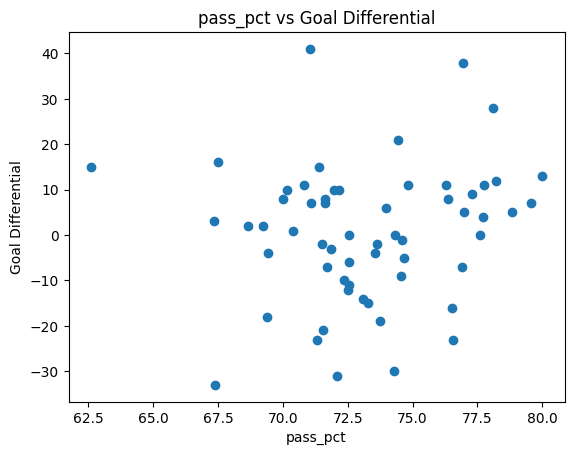

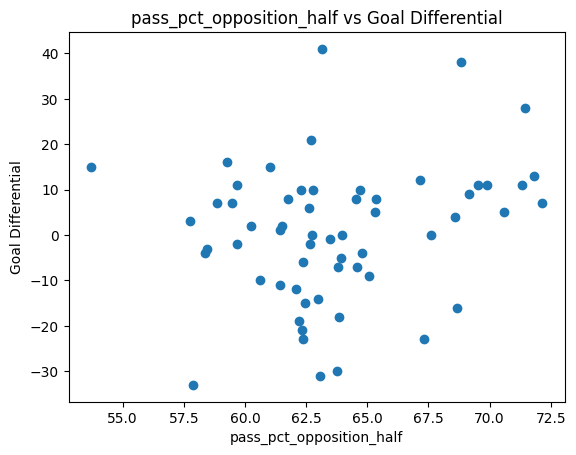

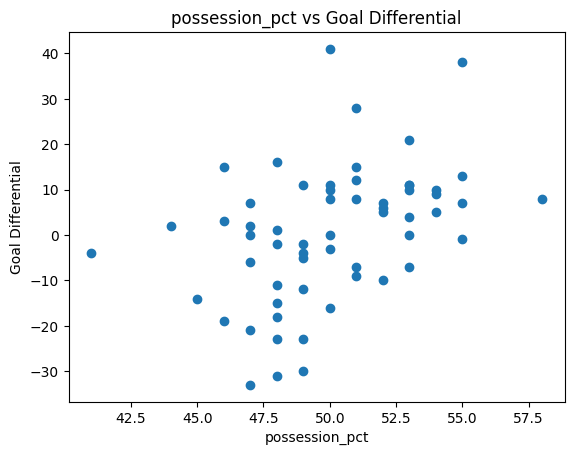

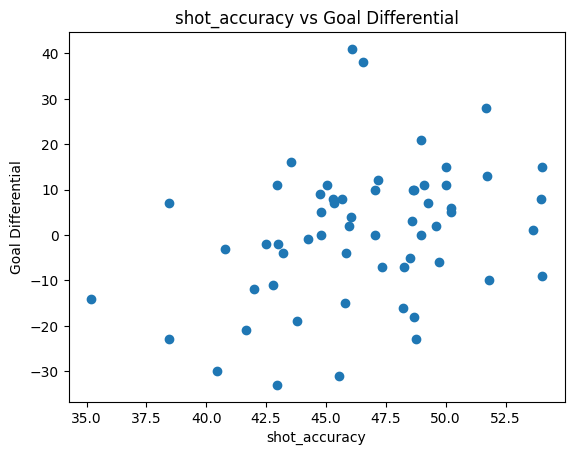

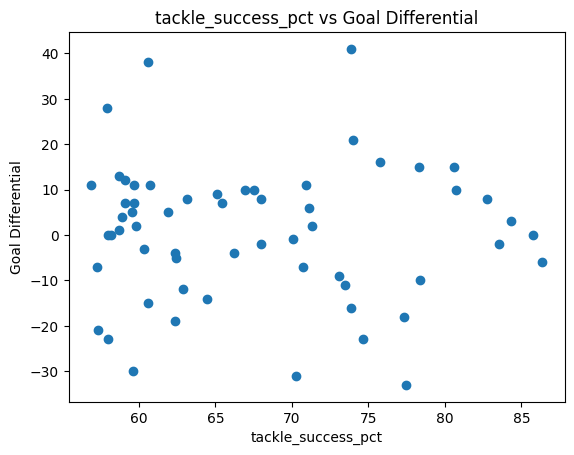

In [4]:
x_soccer_data = soccer_data[['games_played', 'goals', 'goals_conceded',\
'cross_accuracy', 'goal_conversion_pct', 'pass_pct', 'pass_pct_opposition_half', 'possession_pct', \
'shot_accuracy', 'tackle_success_pct']]

y_soccer_data = soccer_data['goal_differential']

for c in x_soccer_data.columns:
    plt.figure()
    plt.scatter(x_soccer_data[c], y_soccer_data)
    plt.title(f'{c} vs Goal Differential')
    plt.xlabel(c)
    plt.ylabel("Goal Differential")
plt.show()

In [18]:
soccer_data.shape

(59, 13)

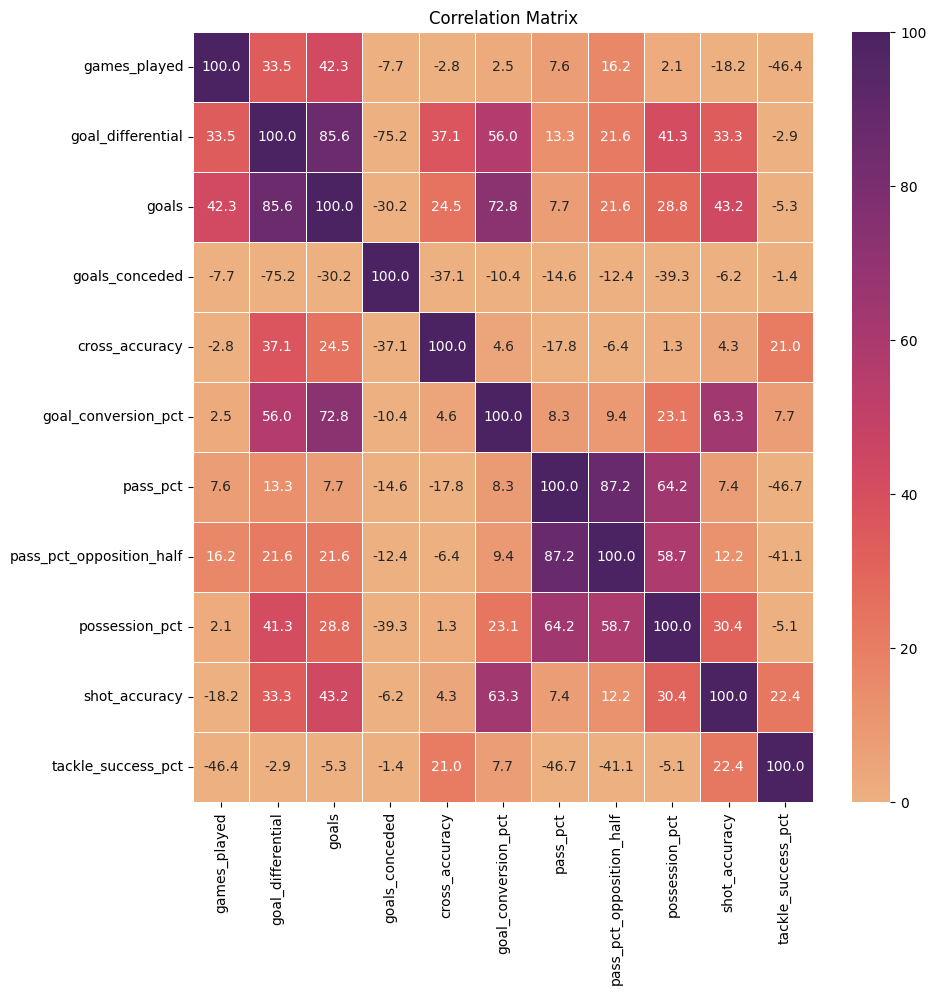

In [10]:
matrix = soccer_data[soccer_data.columns[2:13]].corr() * 100

plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True))
plt.title('Correlation Matrix')
plt.show()

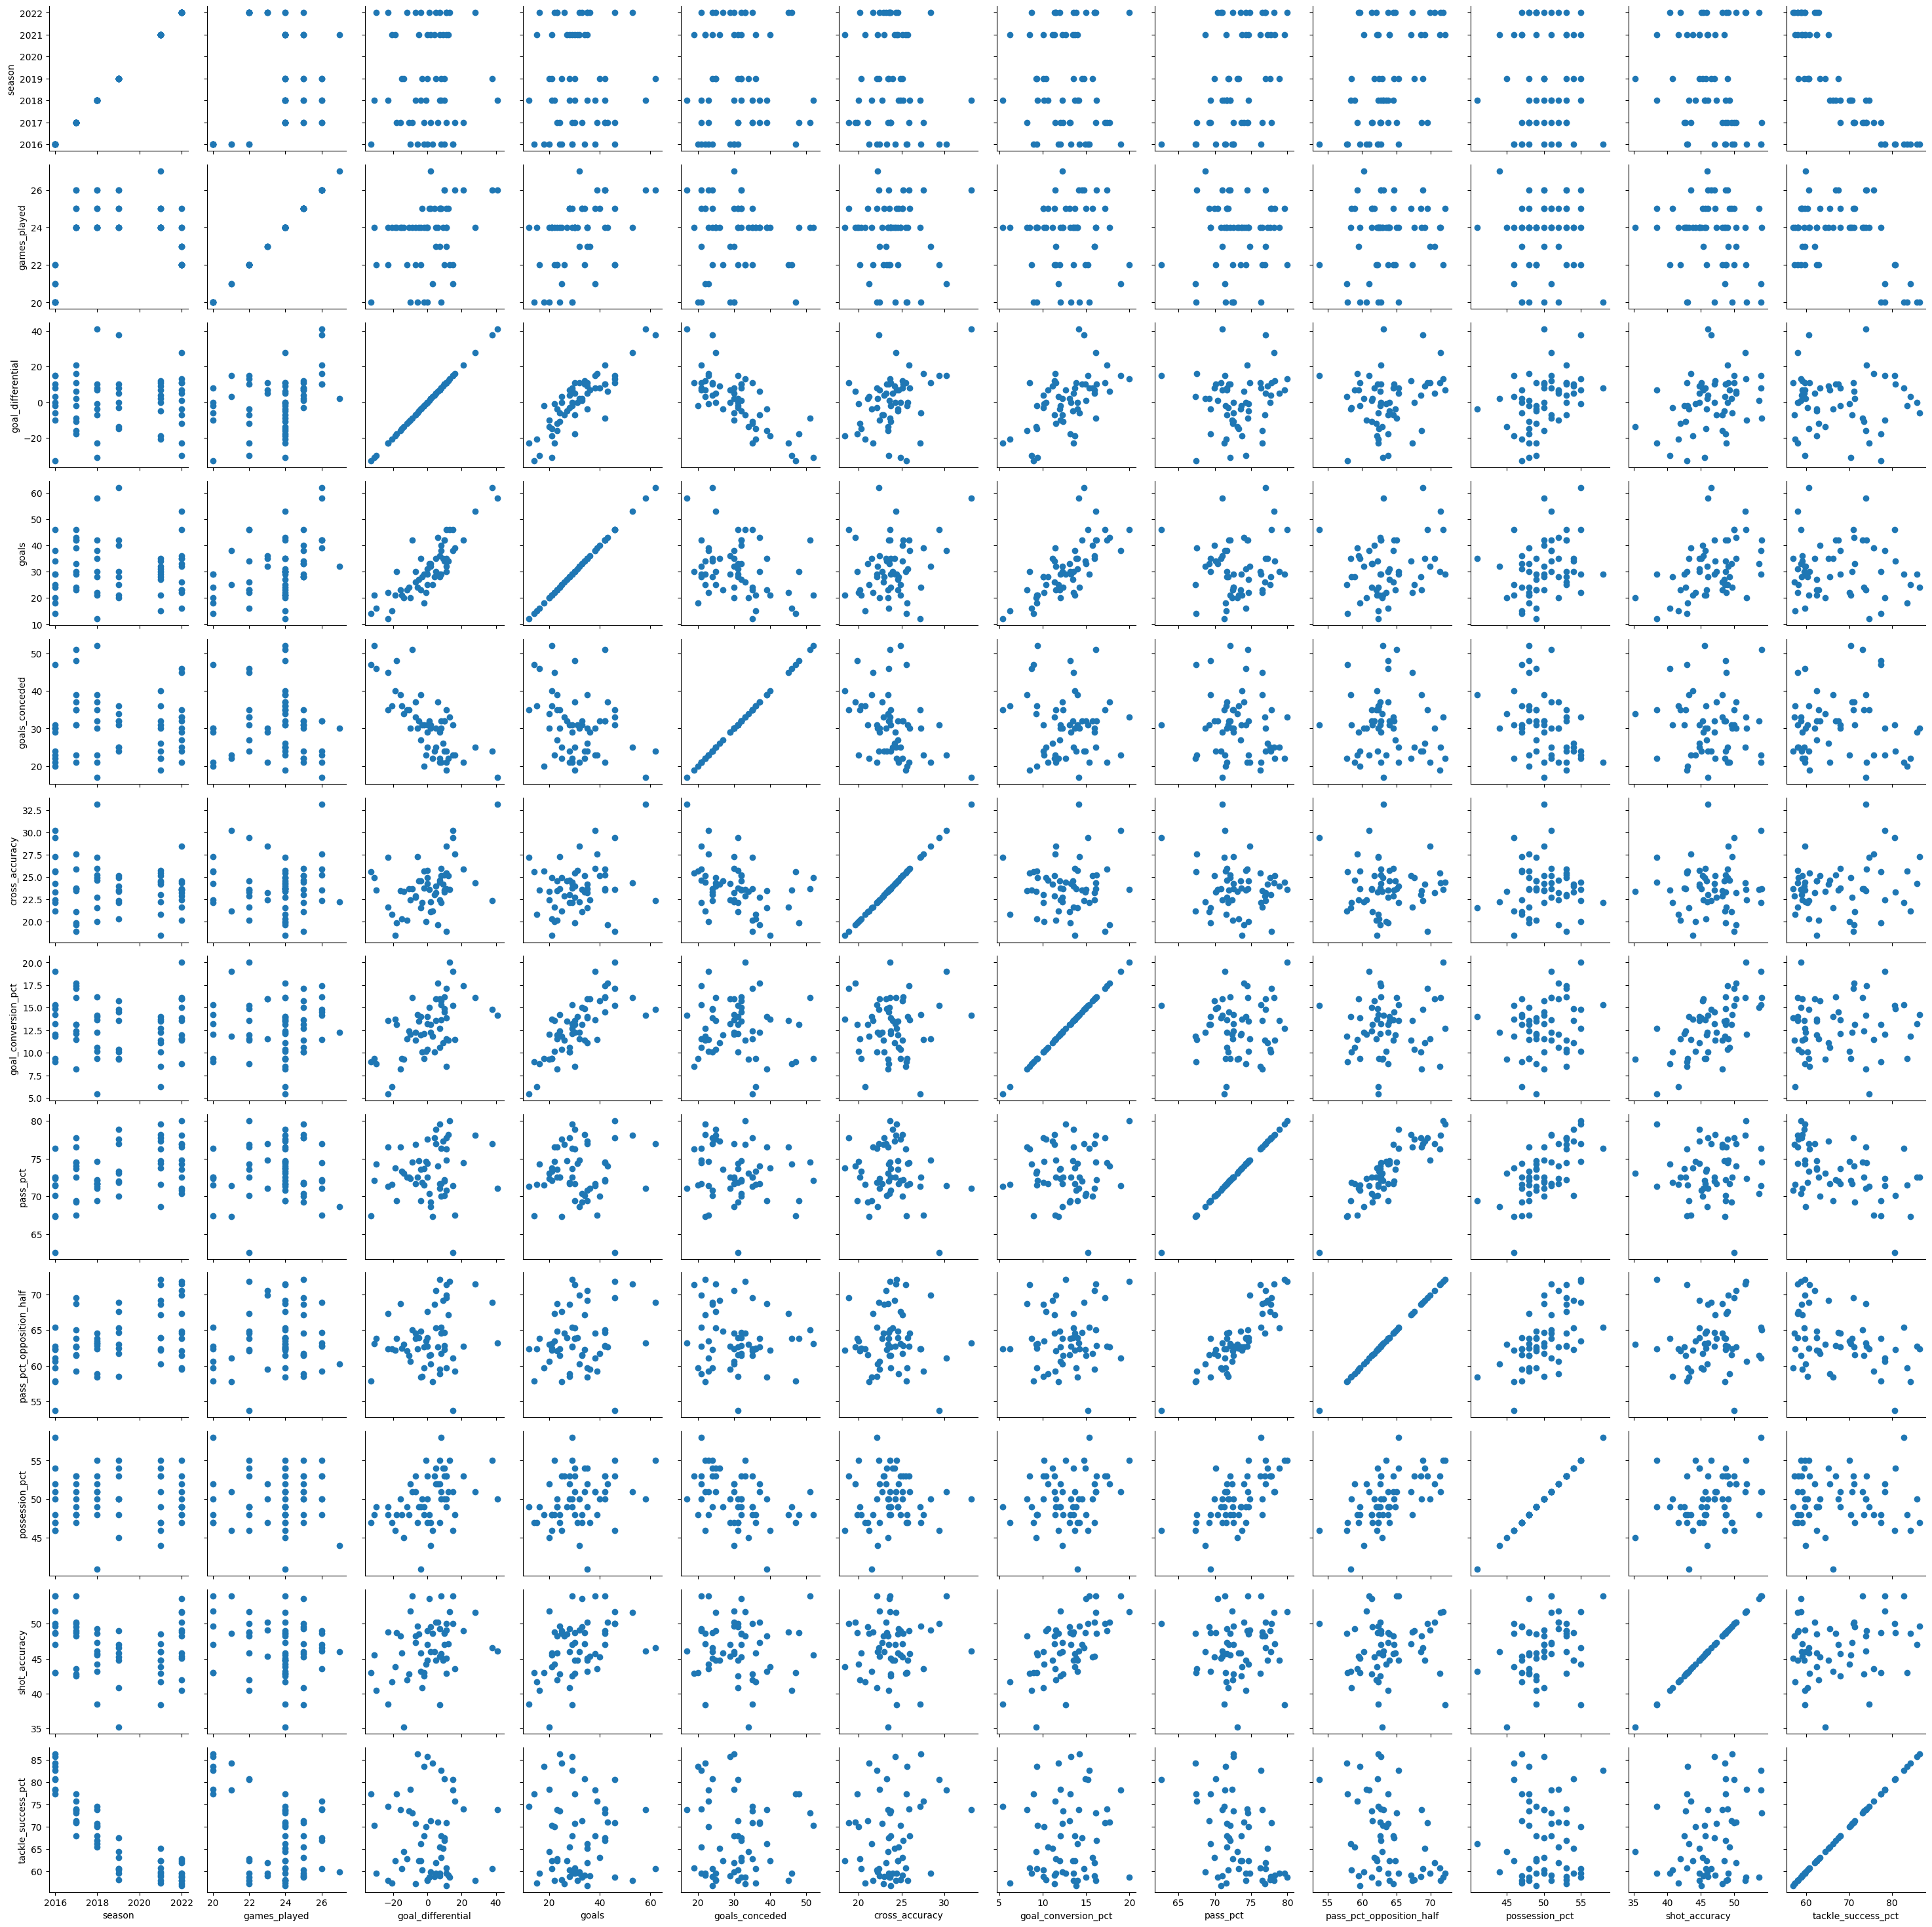

In [16]:
g = sns.PairGrid(soccer_data)
g.map(plt.scatter)

plt.show()

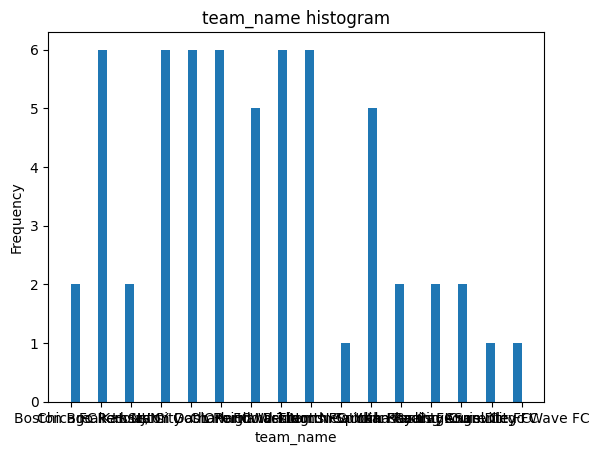

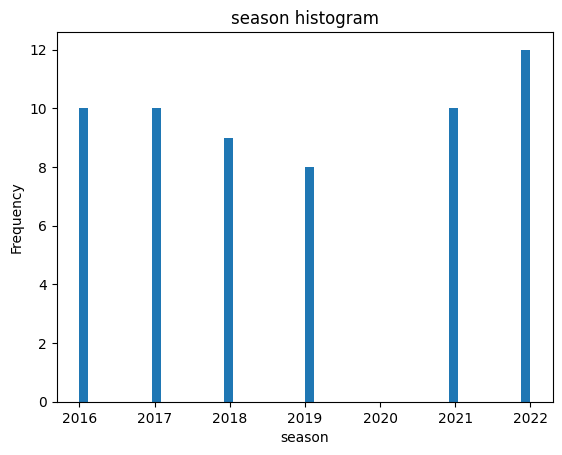

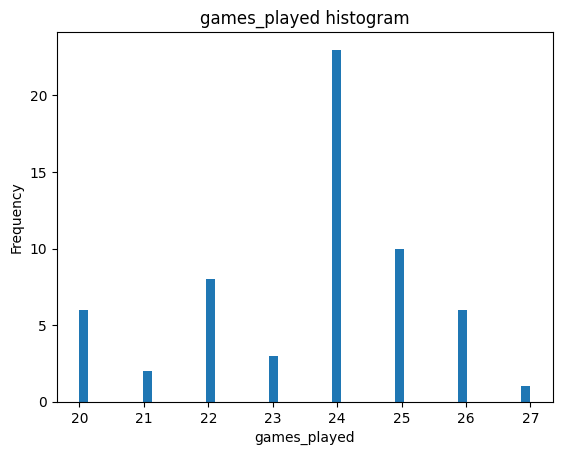

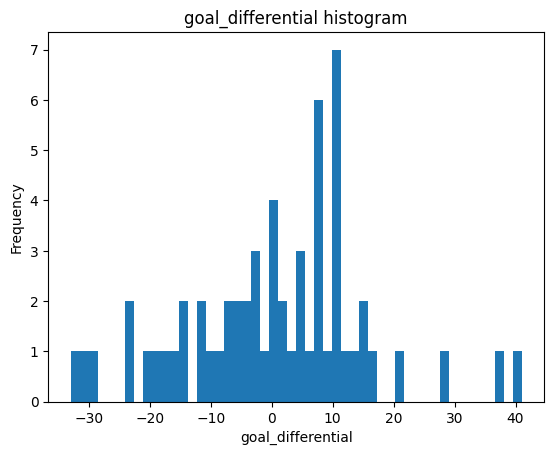

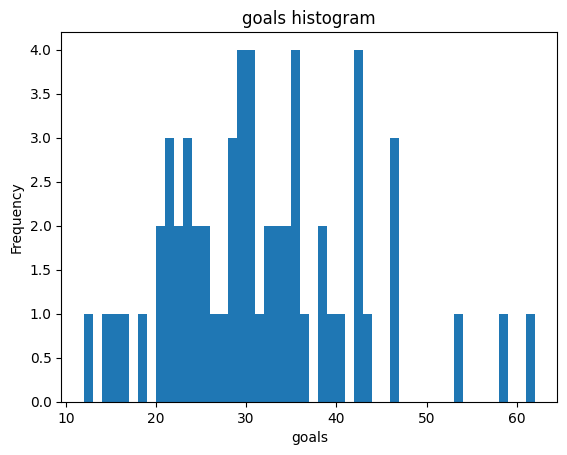

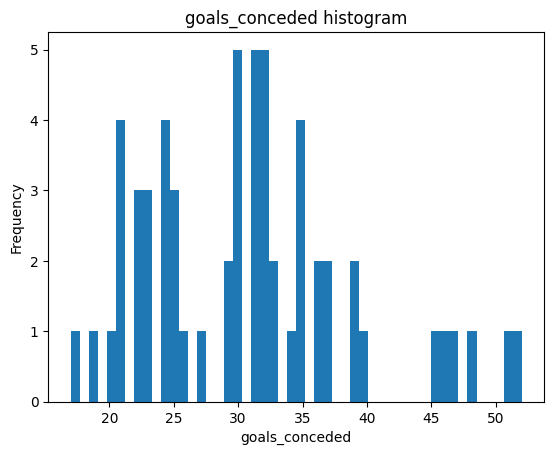

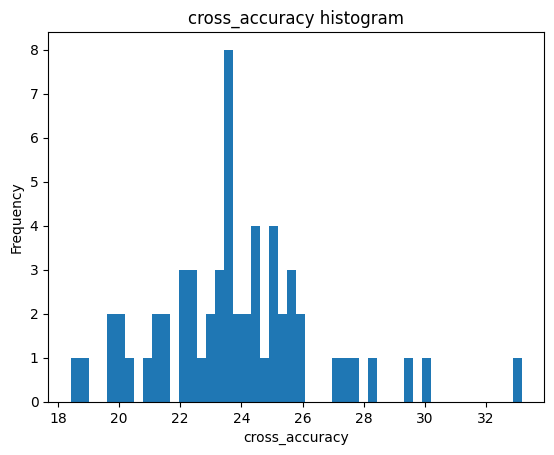

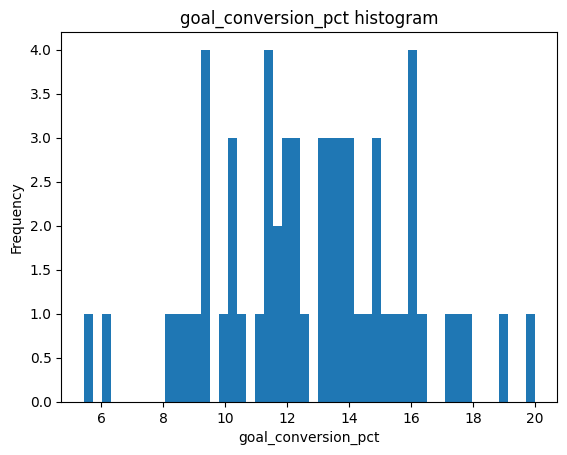

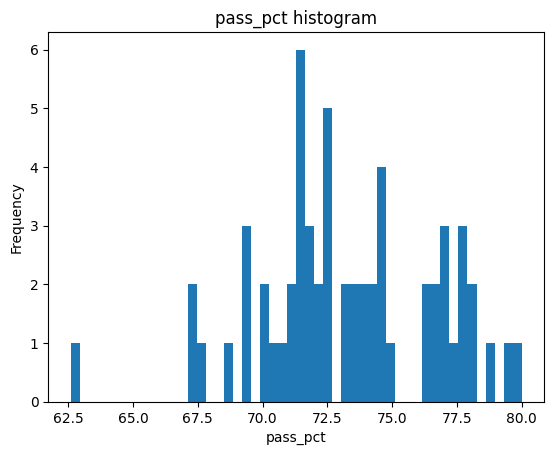

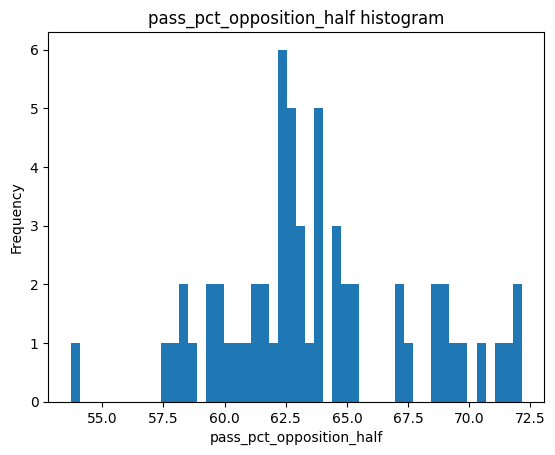

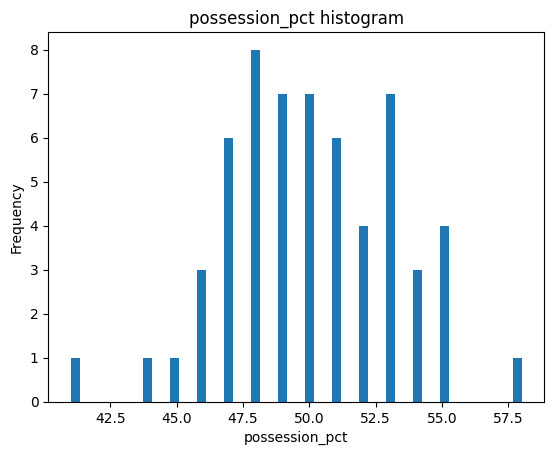

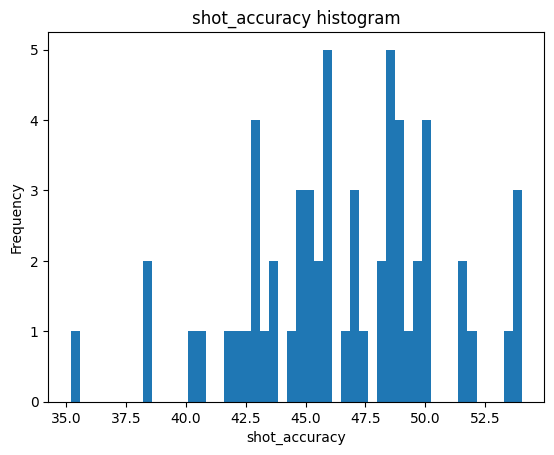

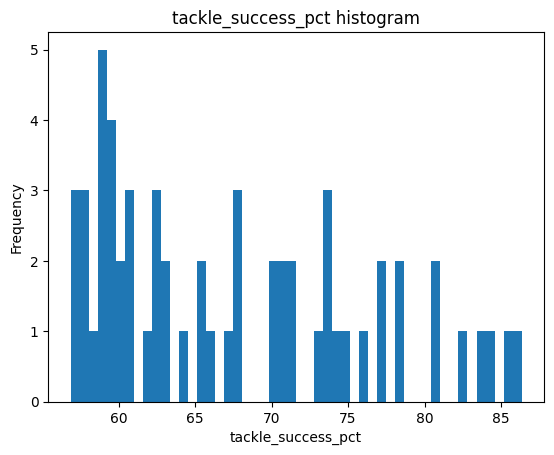

In [15]:
for c in soccer_data.columns:
    plt.figure()
    plt.hist(soccer_data[c], bins = 50)
    plt.title(f'{c} histogram')
    plt.xlabel(c)
    plt.ylabel("Frequency")
plt.show()

In [ ]:
#perfrm PCA
#take out those two cols

In [20]:
#not using goals or goals conceded

X = x_soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct', 'pass_pct', \
'pass_pct_opposition_half', 'possession_pct', 'shot_accuracy', 'tackle_success_pct']]

y = y_soccer_data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data_df

pca = PCA(n_components=.80,random_state=42)
pca_data = pca.fit_transform(scaled_data)

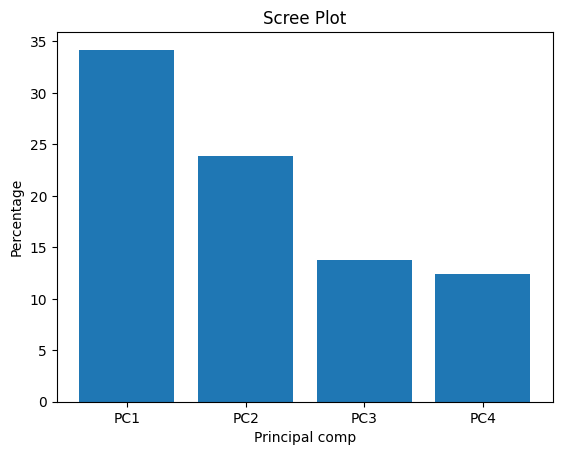

In [21]:
pca.explained_variance_ratio_

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

plt.ylabel('Percentage')

plt.xlabel('Principal comp')

plt.title('Scree Plot')

plt.show()

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


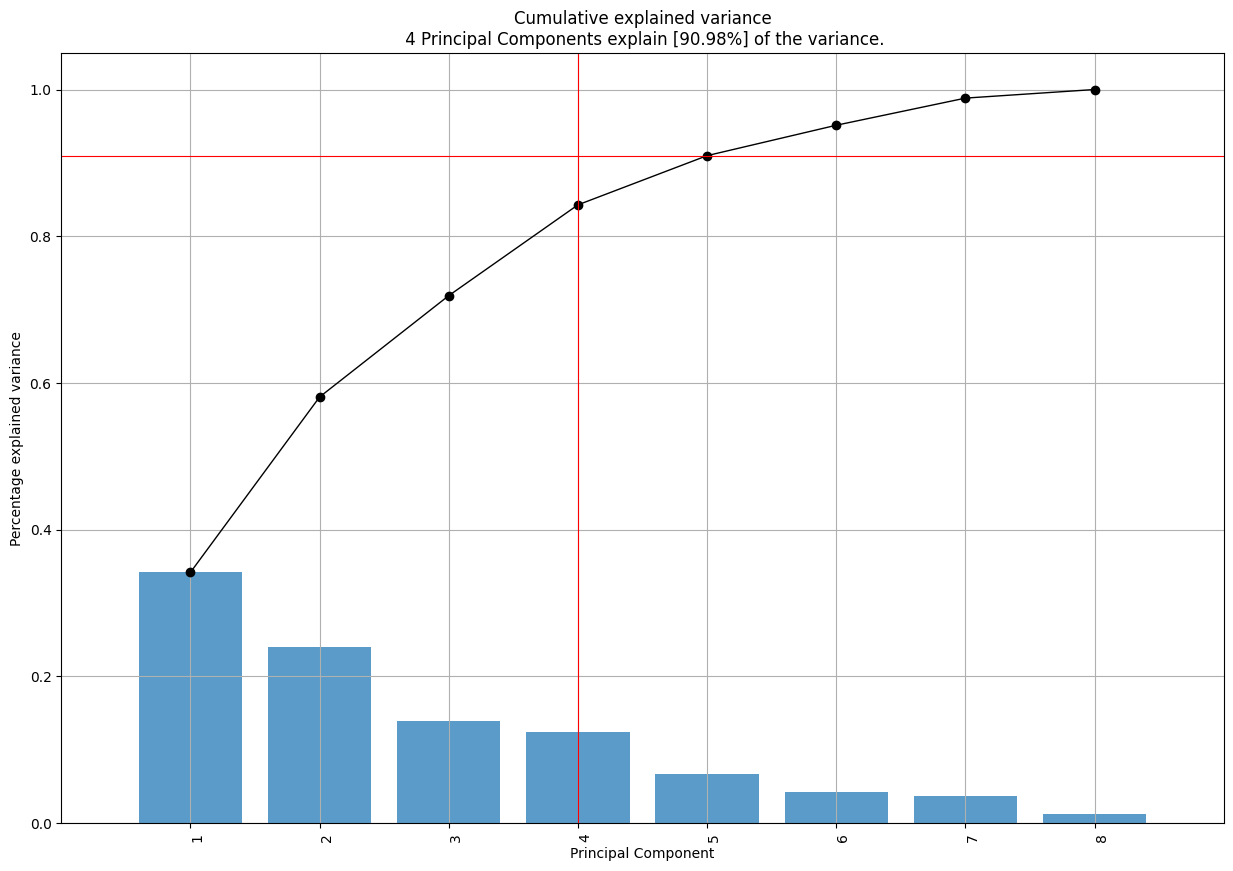

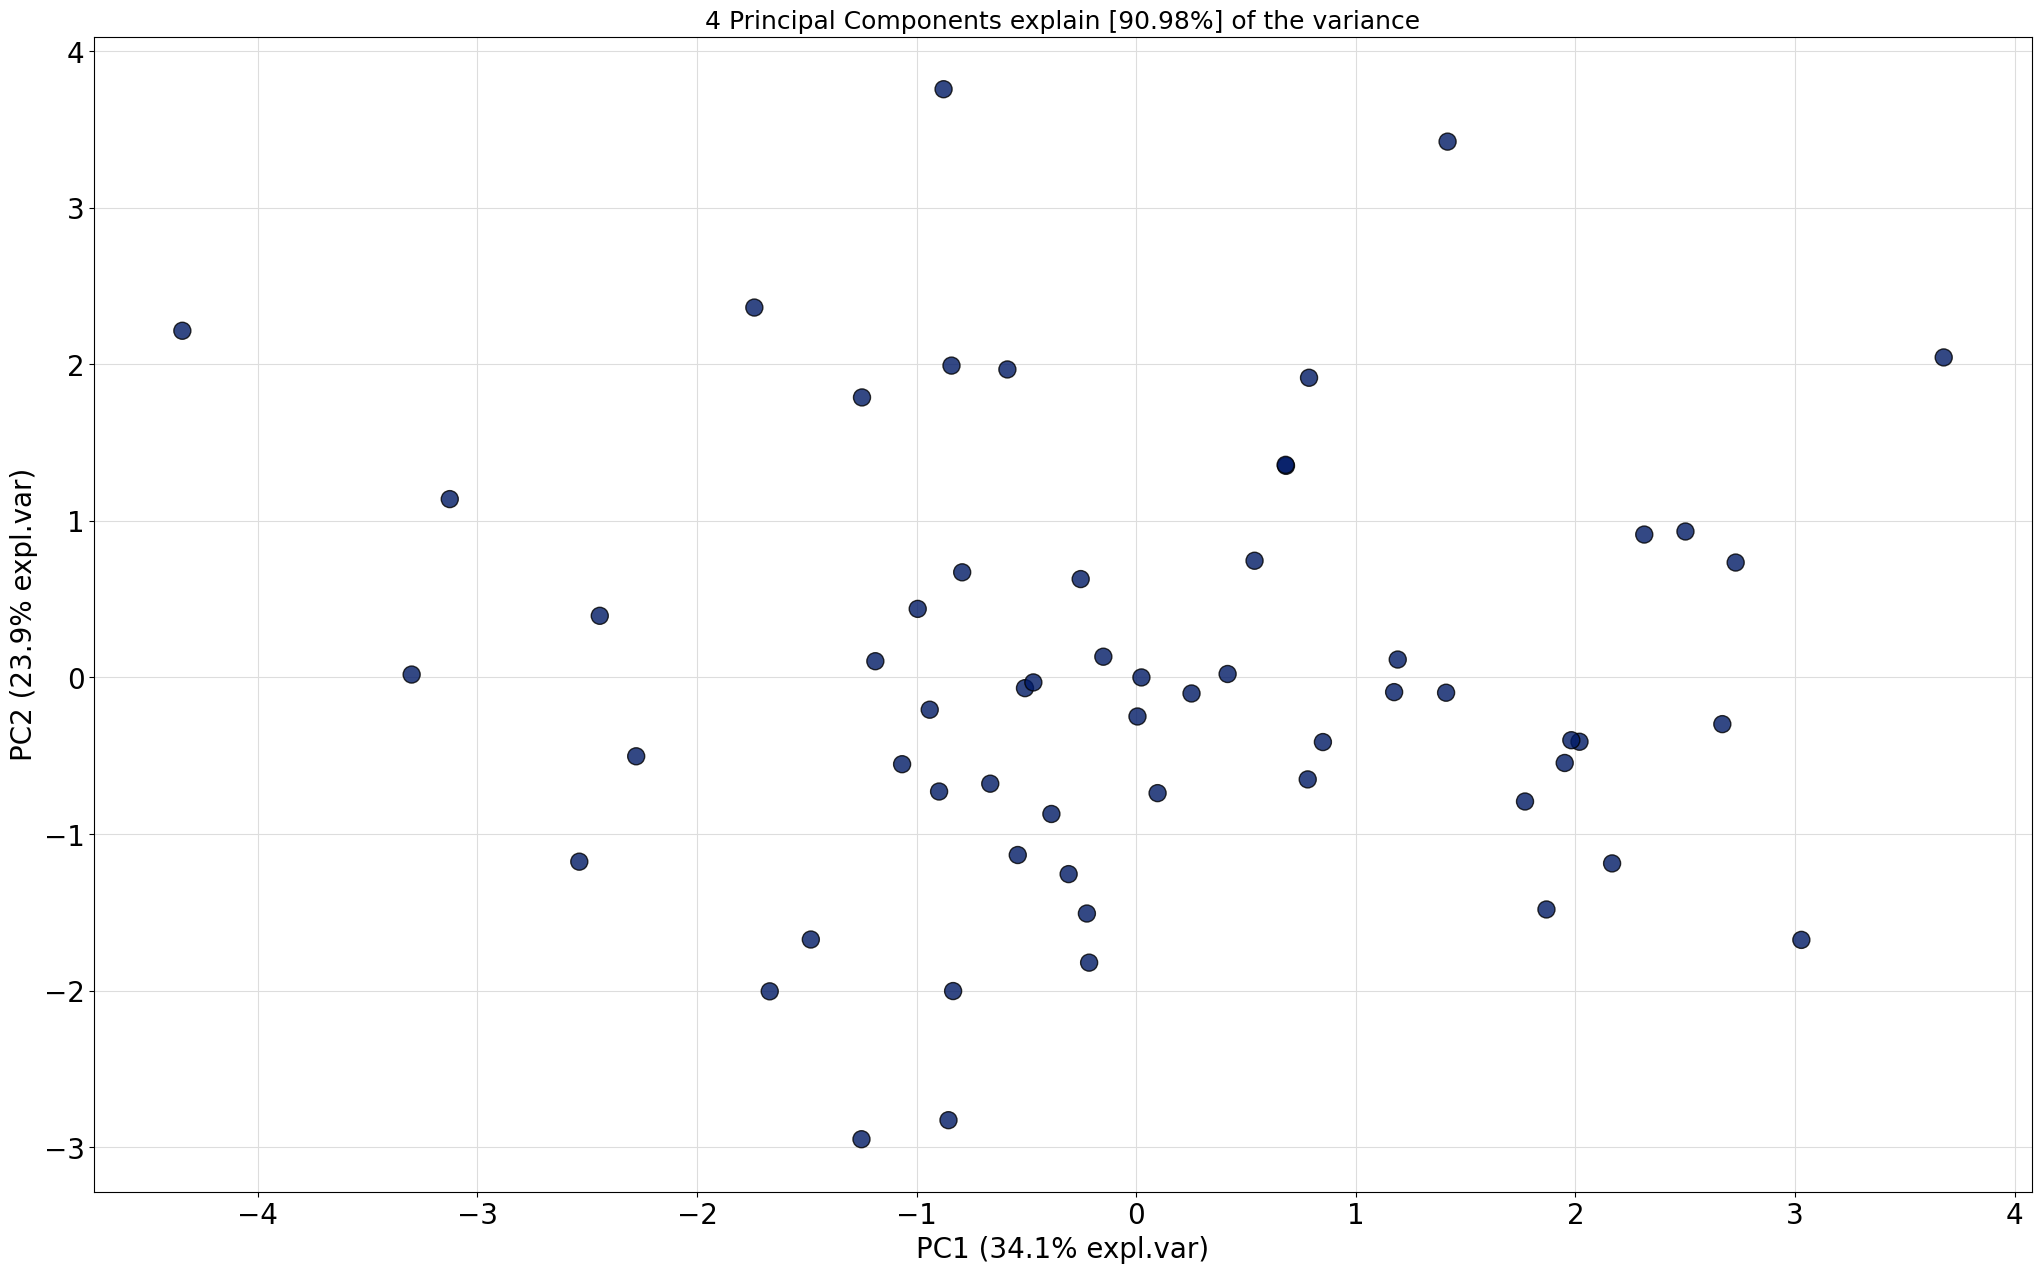

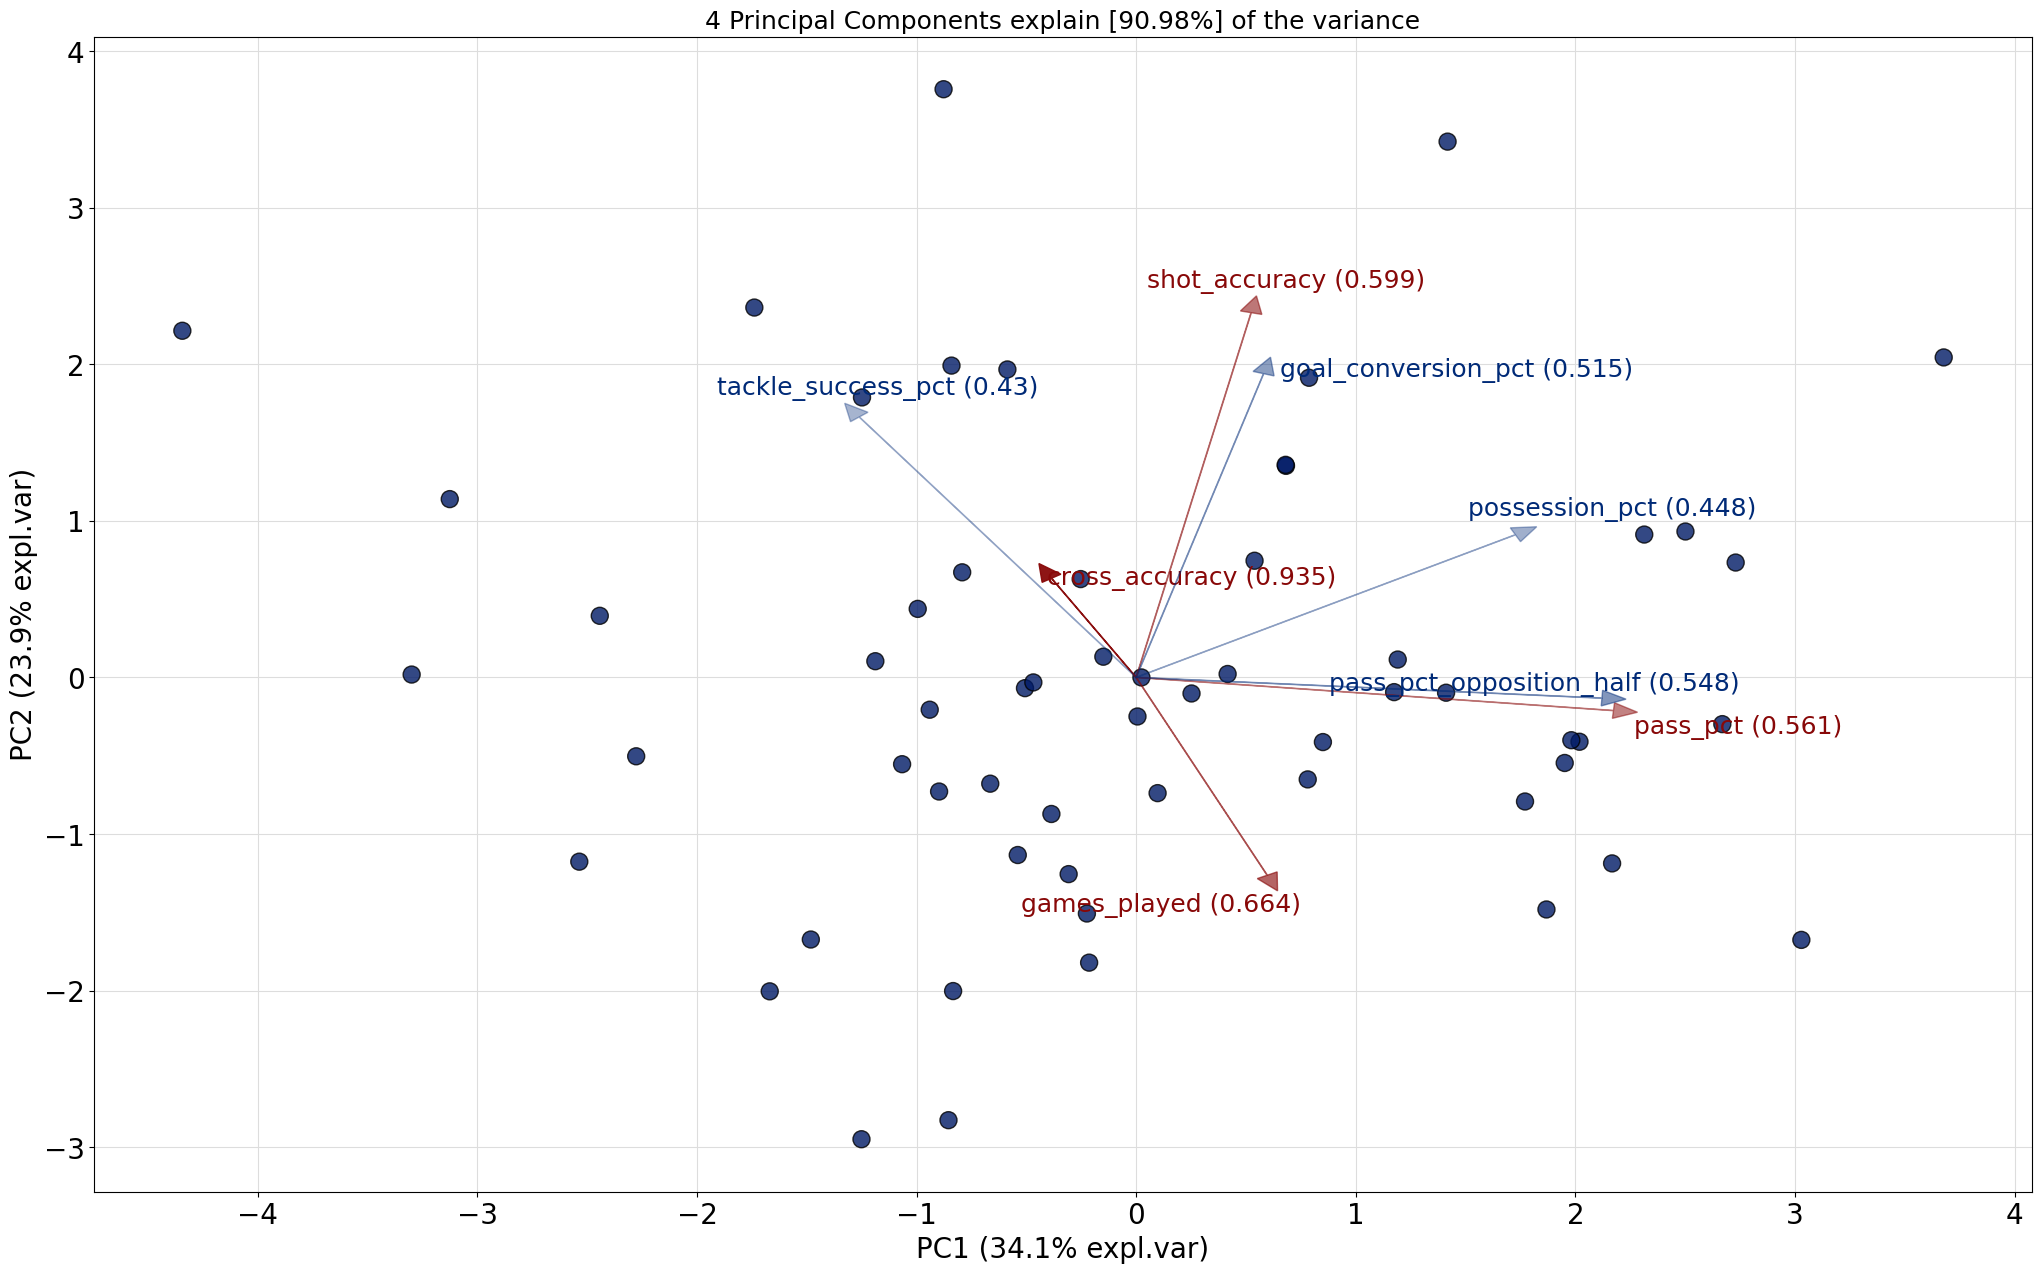

In [22]:
from pca import pca
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
###########################################################
# COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA
model = pca(n_components=0.8)

# Fit and transform
results = model.fit_transform(X=scaled_data_df)

# Plot the explained variance
fig, ax = model.plot()

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot()

In [23]:
#pca_df using 4 PCs to account for just over 90% of the data:

pca_df = pd.DataFrame(pca_data)

pca_df

,0,1,2,3
0,-3.299368,0.018155,-1.766622,0.130626
1,-1.065873,-0.554368,-0.079226,0.044649
2,-3.125800,1.138610,-0.690204,-1.550228
3,-1.187709,0.103420,1.240969,-1.022356
4,0.023972,-0.000238,0.591931,1.025205
5,0.252146,-0.102675,1.290449,0.203651
6,-1.481518,-1.673981,2.359496,-0.405244
7,2.313915,0.912251,0.082069,-0.297650
8,-2.442676,0.393348,-2.359520,0.232941
9,-0.386007,-0.872319,-0.139214,0.128036


In [26]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = pca_df
y = y_soccer_data

linear_regression.fit(X,y)

#plt.scatter(X,y)
#plt.show()

for col in pca_df.columns:
    X = pca_df[[col]]
    y = y_soccer_data
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
    
    linear_regression = LinearRegression()
    reg = linear_regression.fit(X_train, y_train)
    
    y_test_pred = linear_regression.predict(X_test)
    y_train_pred = linear_regression.predict(X_train)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    print(f'Feature Name: {col}\n  Weight: {reg.coef_[0]}')
    print(f'Intercept: {reg.intercept_}')

Feature Name: 0
  Weight: 5.59397384684628
Intercept: -2.443881915550918
Feature Name: 1
  Weight: 1.1208677444194222
Intercept: 1.596366457623861
Feature Name: 2
  Weight: 4.265529209544452
Intercept: 3.982261158683513
Feature Name: 3
  Weight: 0.12437191275278267
Intercept: 2.014217812686465


In [27]:
print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

r2_train = round(linear_regression.score(X_train, y_train),6)
r2_test = round(linear_regression.score(X_test, y_test),6)

print(f'Training R^2: {r2_train}')
print(f'Test R^2: {r2_test}')

Training MSE: 189.6294515647826
Test MSE: 231.39369800935484
Training R^2: 3.6e-05
Test R^2: -0.007156
